# Analyse the results

## Define data directory

A top level directory to store all the data for this experiment

In [1]:
dataDirName = '/home/yram0006/phd/chapter_2/workspace/mortality_data/perfromance_experiment/'

## Function to extract lists

In [2]:
def getLists(d):
    labels = []
    accuracy_scores = []
    balanced_accuracy_scores = []
    average_precision_scores = []
    f1_scores = []
    roc_auc_scores = []
    mccf1_scores = []

    for label, scores in d.items():
        labels.append(label)
        for key, value in scores.items():
            if key == 'test_accuracy':
                accuracy_scores.append(value)
            if key == 'test_balanced_accuracy':
                balanced_accuracy_scores.append(value)
            if key == 'test_average_precision':
                average_precision_scores.append(value)
            if key == 'test_f1':
                f1_scores.append(value)
            if key == 'test_roc_auc':
                roc_auc_scores.append(value)
            if key == 'test_mccf1_score':
                mccf1_scores.append(value)
    return labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores, mccf1_scores

## Raw dataset results

In [3]:
import pickle
import os
from pathlib import Path

scoresFile = dataDirName + 'performance_icd_vb_0_va_72_lb_0_la_72/cv_scores_ts_0_te_7.pickle'

scoresDict = {}

with open(Path(scoresFile), 'rb') as fp:
    scoresDict = pickle.load(fp)

labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores, mccf1_scores = getLists(scoresDict)

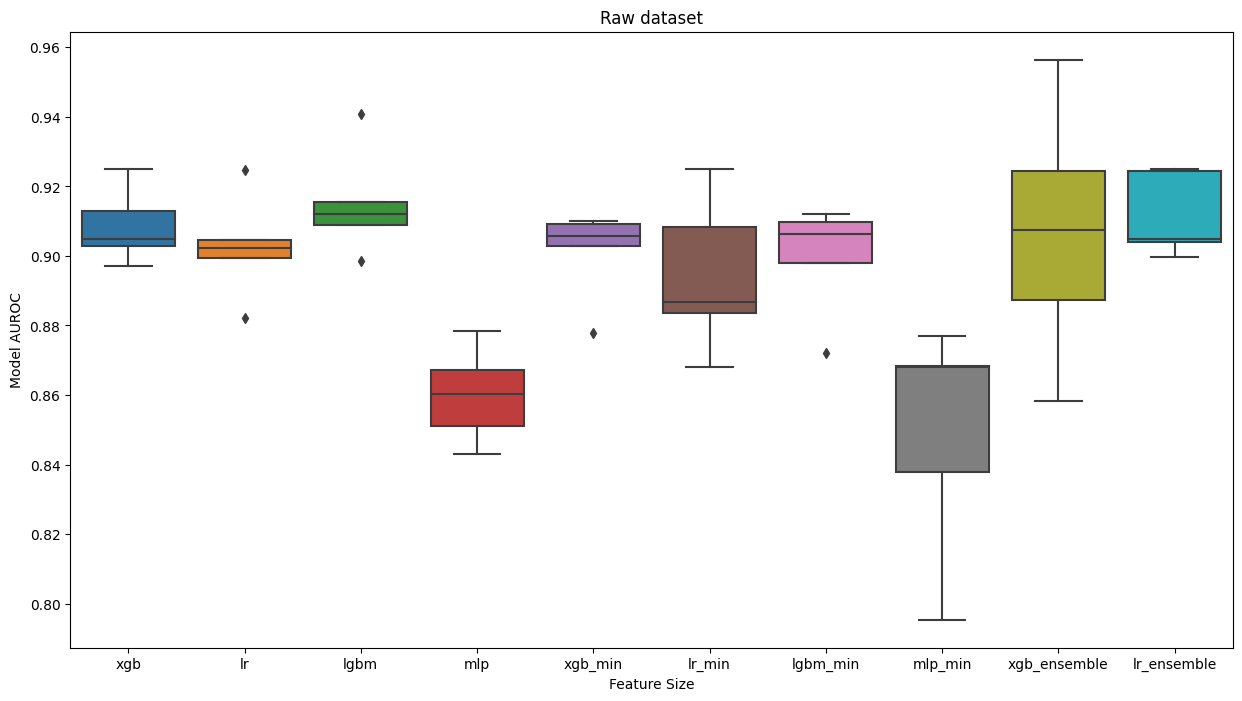

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,8))
ax = sns.boxplot(data=roc_auc_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model AUROC')
ax.set_title('Raw dataset')
plt.show()

In [5]:
dataDict = {
    'group': [],
    'accuracy': [],
    'balanced_accuracy': [],
    'average_precision': [],
    'f1': [],
    'roc_auc': [],
    'mccf1_score': []
}

for i in range(len(labels)):
    dataDict['group'].append(labels[i])
    dataDict['accuracy'].append(accuracy_scores[i].mean())
    dataDict['balanced_accuracy'].append(balanced_accuracy_scores[i].mean())
    dataDict['average_precision'].append(average_precision_scores[i].mean())
    dataDict['f1'].append(f1_scores[i].mean())
    dataDict['roc_auc'].append(roc_auc_scores[i].mean())
    dataDict['mccf1_score'].append(mccf1_scores[i].mean())


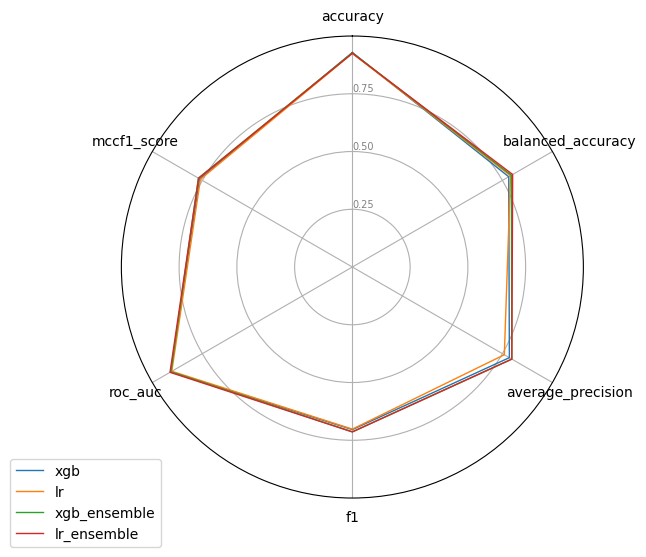

In [6]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame(dataDict)
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
# ax.figsize(10, 10)
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75], ["0.25","0.50","0.75"], color="grey", size=7)
plt.ylim(0,1)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

for i in [0, 1, 8, 9]:
    # Ind1
    values=df.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=labels[i])
    # ax.fill(angles, values, 'b', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [7]:
import os
import pickle
from pathlib import Path
import pandas as pd


data = []

scoresFile = Path(dataDirName, 'performance_icd_vb_0_va_72_lb_0_la_72', 'cv_scores_ts_0_te_7.pickle')
scoresDict = {}
with open(Path(scoresFile), 'rb') as fp:
    scoresDict = pickle.load(fp)
labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores, mccf1_scores = getLists(scoresDict)
for i in range(len(labels)):
    data.append([labels[i], 'accuracy', accuracy_scores[i].mean()])
    data.append([labels[i], 'roc_auc', roc_auc_scores[i].mean()])
    data.append([labels[i], 'balanced_accuracy', balanced_accuracy_scores[i].mean()])
    data.append([labels[i], 'average_precision', average_precision_scores[i].mean()])
    data.append([labels[i], 'mccf1', mccf1_scores[i].mean()])
    data.append([labels[i], 'f1', f1_scores[i].mean()])
linePlotDf = pd.DataFrame(data, columns=['Model', 'Metric', 'Average AUROC Score'])

/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: Fut

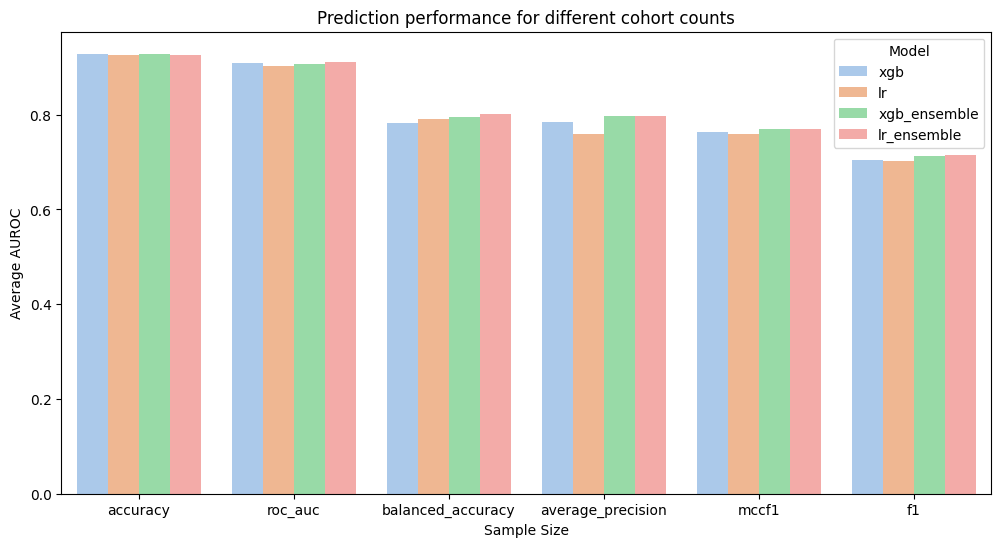

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.barplot(data=linePlotDf[linePlotDf.Model.isin(['xgb', 'lr', 'xgb_ensemble', 'lr_ensemble'])], x='Metric', y='Average AUROC Score', hue='Model', palette=sns.color_palette("pastel"))
ax.set(xlabel='Sample Size')
ax.set(ylabel='Average AUROC')
ax.set_title('Prediction performance for different cohort counts')
plt.show()